In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [38]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [40]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [41]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [42]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).scalar()
print (f"Most Recent Date: {recent_date}")

Most Recent Date: 2017-08-23


One Year Ago: 2016-08-23 00:00:00


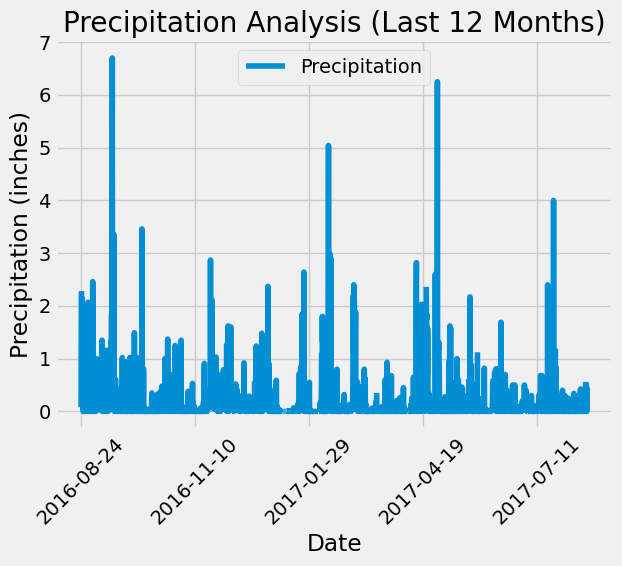

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
print(f"One Year Ago: {one_year}")

# Perform a query to retrieve the data and precipitation scores
precip_data = (
    session.query(measurement.date, measurement.prcp)
    .filter(measurement.date >= one_year)
    .order_by (measurement.date).all()
)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precip_data, columns=["Date", "Precipitation"])

# Sort the dataframe by date
df.set_index("Date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Analysis (Last 12 Months)")
plt.grid(True)
plt.show()


In [45]:
# Use Pandas to calculate the summary statistics for the precipitation data
display(df.describe())

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station.station).count()
print(f"Total Number of Stations: {stations}")


Total Number of Stations: 9


In [47]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = (
    session.query(measurement.station, func.count(measurement.station))
    .group_by(measurement.station)
    .order_by(func.count(measurement.station).desc()).all()
)

print("Most Active Stations:")
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")

Most Active Stations:
Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0][0]

temp_calc = (
    session.query(
        func.min(measurement.tobs),
        func.max(measurement.tobs),
        func.avg(measurement.tobs)
    )
    .filter(measurement.station == most_active).all()
)

min_temp, max_temp, avg_temp = temp_calc[0]
print(f"Most active station ({most_active})")
print(f"Lowest Temperature: {min_temp}, Highest Temperature: {max_temp}, Average Temperature: {avg_temp:.2f}")

Most active station (USC00519281)
Lowest Temperature: 54.0, Highest Temperature: 85.0, Average Temperature: 71.66


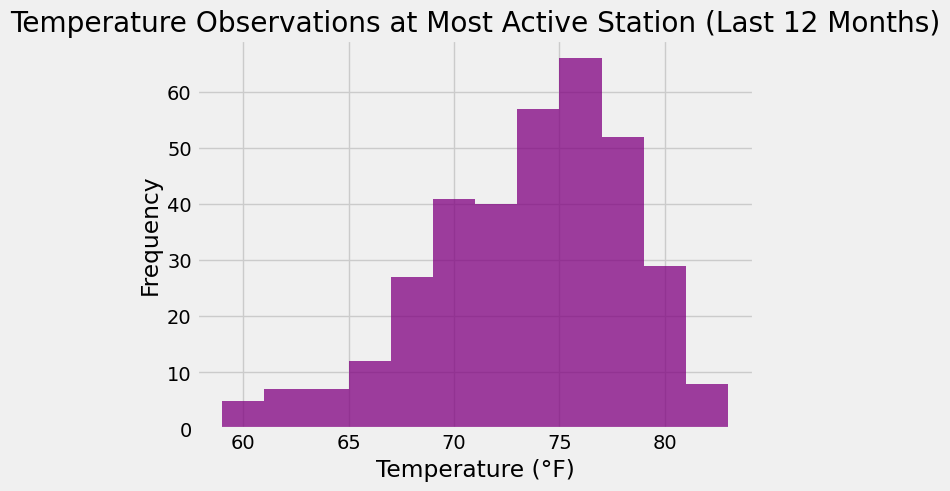

In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_calc = ( 
    session.query(measurement.tobs) 
    .filter(measurement.station == most_active) 
    .filter(measurement.date >= one_year) .all()
)

temp_calc_df = pd.DataFrame(temp_calc, columns=["Temperature"])
plt.hist(temp_calc_df["Temperature"], bins=12, color="purple", alpha=0.75)
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Observations at Most Active Station (Last 12 Months)")
plt.grid(True)
plt.show()

# Close Session

In [16]:
# Close Session
session.close()